## Creating CNN Using Scratch And Transfer Learning

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
# importing the libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE=[224,224]

In [ ]:
# Creating CNN model using Transfer Learning
#Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [ ]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/datasets/malaria dataset/Dataset/Train/*')

In [ ]:
folders

['/content/drive/MyDrive/datasets/malaria dataset/Dataset/Train/Parasite',
 '/content/drive/MyDrive/datasets/malaria dataset/Dataset/Train/Uninfected']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 28, 28, 64)      

In [ ]:
# cost and optimization method
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset(here image augmentation is done)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# loading the dataset(pictures) from the drive directory
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/datasets/malaria dataset/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/datasets/malaria dataset/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell.
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-164-80bc53e495fb>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
13/13 [==============================] - 7s 442ms/step - loss: 1.7488 - accuracy: 0.4904 - val_loss: 0.6571 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 6s 445ms/step - loss: 0.6741 - accuracy: 0.6731 - val_loss: 0.7340 - val_accuracy: 0.3284
Epoch 3/50
13/13 [==============================] - 5s 414ms/step - loss: 0.5706 - accuracy: 0.7115 - val_loss: 0.9239 - val_accuracy: 0.2687
Epoch 4/50
13/13 [==============================] - 6s 492ms/step - loss: 0.4840 - accuracy: 0.7428 - val_loss: 1.0574 - val_accuracy: 0.2836
Epoch 5/50
13/13 [==============================] - 5s 415ms/step - loss: 0.5019 - accuracy: 0.7596 - val_loss: 0.7911 - val_accuracy: 0.3881
Epoch 6/50
13/13 [==============================] - 5s 409ms/step - loss: 0.4472 - accuracy: 0.7957 - val_loss: 0.8841 - val_accuracy: 0.3731
Epoch 7/50
13/13 [==============================] - 6s 461ms/step - loss: 0.4229 - accuracy: 0.7861 - val_loss: 1.2984 - val_accuracy: 0.3507
Epoch 

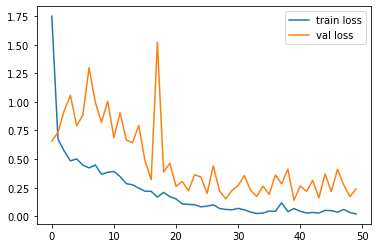

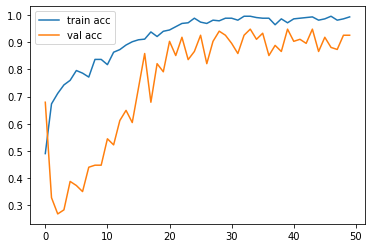

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
#Save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_vgg19_h5')


In [ ]:

y_pred = model.predict(test_set)


5/5 [==============================] - 1s 78ms/step


In [ ]:
y_pred

array([[0.52654284, 0.47345713],
       [0.50827444, 0.49172556],
       [0.50876296, 0.49123698],
       [0.5065702 , 0.4934298 ],
       [0.504473  , 0.49552703],
       [0.5304875 , 0.46951252],
       [0.5107362 , 0.4892637 ],
       [0.50778973, 0.4922103 ],
       [0.49118894, 0.50881106],
       [0.50267106, 0.49732897],
       [0.5016276 , 0.49837238],
       [0.50942755, 0.49057248],
       [0.517679  , 0.48232105],
       [0.49900323, 0.50099677],
       [0.5046131 , 0.49538693],
       [0.52047217, 0.4795278 ],
       [0.50571024, 0.49428973],
       [0.5112122 , 0.48878774],
       [0.508986  , 0.49101403],
       [0.5042208 , 0.49577925],
       [0.50736916, 0.49263084],
       [0.53046405, 0.46953595],
       [0.5171049 , 0.4828951 ],
       [0.50877863, 0.4912213 ],
       [0.50428057, 0.49571946],
       [0.51245344, 0.48754653],
       [0.4852396 , 0.51476043],
       [0.51854026, 0.48145977],
       [0.49495745, 0.5050426 ],
       [0.51681864, 0.48318142],
       [0.

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg19.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/datasets/malaria dataset/Dataset/Test/Uninfected/2.png',target_size=(224,224))


In [ ]:
#img=image.load_img('/content/drive/MyDrive/datasets/malaria dataset/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105803_cell_103.png',target_size=(224,224))


In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 0s 22ms/step


array([[1., 0.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 19ms/step


In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
